# **TFG - ALBA CASILLAS**

# ============================================================
# CONEXIÓN CON GOOGLE DRIVE
# ============================================================

In [ ]:
from google.colab import drive
drive.mount("/content/drive") # Se monta el Drive

from google.colab import files

Mounted at /content/drive


In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.1 MB/s 


# ============================================================
# USO DE FICHEROS .PY COMO MÓDULO EN COLAB
# ============================================================

In [ ]:
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/dataobject.py /content
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/etl.py /content
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/model.py /content
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/objects.py /content
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/processing.py /content
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/utils.py /content
!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/src/visualize.py /content

!cp /content/drive/MyDrive/TFG_Alba/GeneFlow_Colab/geneflow.py /content

# ============================================================
# LIBRERÍAS USADAS
# ============================================================

In [ ]:
import geneflow as gnf
from sklearn.naive_bayes import GaussianNB

# ============================================================
# SEMILLA AJUSTADA A 1
# ============================================================

In [ ]:
import random
random.seed(1)

# ============================================================
# ~ READ DATA
# ============================================================

In [ ]:
# =============================================================================
# ~ READ DATA
# =============================================================================

#data_object = genf.create_gdc_query(project = "TCGA-BRCA", data_category = "TRANSCRIPTOME PROFILING", data_type = "Gene Expression Quantification",
#                        experimental_strategy = "RNA-Seq")

# ProcessGDC.download_data(data_object)

# data = ProcessGDC.read_rna("TCGA-BRCA")

# data.to_csv(r'D:/TFG_archivos/info_y_copias/OOB_API/brca_counts.txt', sep='\t')

count_data = gnf.read_file("/content/drive/MyDrive/TFG_Alba/DatosPrueba/brca_counts.txt", index = "gene_id", sep="\t")

clinical_data = gnf.gdc_read_clinical("/content/drive/MyDrive/TFG_Alba/DatosPrueba/TCGA-BRCA/nationwidechildrens.org_clinical_patient_brca.txt")

gene_info = gnf.read_file("/content/drive/MyDrive/TFG_Alba/DatosPrueba/gene_info_brca.tsv", index = "gene_id", sep="\t")

# ============================================================
# ~ CREATE DATA OBJECT
# ============================================================

In [ ]:
# =============================================================================
# ~ CREATE DATA OBJECT
# =============================================================================

data_object = gnf.create_data_object(count_data, obs_ = clinical_data, var_ = gene_info)

data_object.summary_object()
print("\n\n")


# Define a list of Log to create a Pipeline
logs = []


Creating DataObject...


##############################################

Data Object
	Dimensions:  (60660, 1225)
	Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
	Column Names (1225): TCGA-3C-AAAU ... TCGA-Z7-A8R6

	Var
		Dimensions:  (60660, 2)
		Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
		Column Names (2): gene_name ... gene_type

	Obs
		Dimensions:  (1094, 111)
		Row Names (1094): TCGA-3C-AAAU ... TCGA-Z7-A8R6
		Column Names (111): bcr_patient_uuid ... tumor_tissue_site

##############################################





In [ ]:
copy_ = gnf.copy_object(data_object)

copy_.summary_object()

data_object.summary_object()


if copy_ is data_object:
  print("TRUE")
else:
  print("FALSE")


##############################################

Data Object
	Dimensions:  (60660, 1225)
	Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
	Column Names (1225): TCGA-3C-AAAU ... TCGA-Z7-A8R6

	Var
		Dimensions:  (60660, 2)
		Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
		Column Names (2): gene_name ... gene_type

	Obs
		Dimensions:  (1094, 111)
		Row Names (1094): TCGA-3C-AAAU ... TCGA-Z7-A8R6
		Column Names (111): bcr_patient_uuid ... tumor_tissue_site

##############################################

##############################################

Data Object
	Dimensions:  (60660, 1225)
	Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
	Column Names (1225): TCGA-3C-AAAU ... TCGA-Z7-A8R6

	Var
		Dimensions:  (60660, 2)
		Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
		Column Names (2): gene_name ... gene_type

	Obs
		Dimensions:  (1094, 111)
		Row Names (1094): TCGA-3C-AAAU ... TCGA-Z7-A8R6
		Column Names (111): bcr_patient_uuid ... tu

# ============================================================
# ~ CLEANING CLINICAL DATA
# ============================================================

In [ ]:
data_object = genf.obs_replace(data_object, to_replace = [ "[Discrepancy]", "[Not Available]", "[Not Applicable]"])

data_object.summary_object()


##############################################

Data Object
	Dimensions:  (60660, 1225)
	Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
	Column Names (1225): TCGA-3C-AAAU ... TCGA-Z7-A8R6

	Var
		Dimensions:  (60660, 2)
		Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
		Column Names (2): gene_name ... gene_type

	Obs
		Dimensions:  (1094, 111)
		Row Names (1094): TCGA-3C-AAAU ... TCGA-Z7-A8R6
		Column Names (111): bcr_patient_uuid ... tumor_tissue_site

##############################################


# ============================================================
# ~ FILTER SAMPLES
# ============================================================

In [ ]:
# Check distribution of gender and histological_type

print("Distribution of gender:\n")

genf.count_types(data_object.get_obs(), "gender")


print("\n\n")
print("Distribution of histological type:\n")


genf.count_types(data_object.get_obs(), "histological_type")


print("\n\n")


# Filter samples to female with the most frequent histological subtype and sample subtype

series_condition_rows = (data_object.get_obs()["histological_type"].str.lower() == 'infiltrating ductal carcinoma') & (data_object.get_obs()["gender"].str.lower() == 'female')

extracted_by_series = genf.data_selection_series(series_condition_rows, data_object.get_obs())

data_object = genf.set_obs(data_object, extracted_by_series)

# data_object.summary_object()

genf.count_types(data_object.get_obs(), "pathologic_stage")

Distribution of gender:

FEMALE    1082
MALE        12
Name: gender, dtype: int64 




Distribution of histological type:

Infiltrating Ductal Carcinoma       783
Infiltrating Lobular Carcinoma      203
Other, specify                       45
Mixed Histology (please specify)     29
Mucinous Carcinoma                   17
Metaplastic Carcinoma                 9
Medullary Carcinoma                   6
Infiltrating Carcinoma NOS            1
Name: histological_type, dtype: int64 




Stage IIA     263
Stage IIB     179
Stage IIIA    106
Stage I        69
Stage IA       66
Stage IIIC     29
Stage IIIB     19
Stage IV       16
Stage X         9
Stage IB        5
Stage II        3
Name: pathologic_stage, dtype: int64 



# ============================================================
# ~ ASSIGN A LABEL TO EACH EXAMPLE OF THE DATASET
# ============================================================

In [ ]:
obs_with_label = genf.add_label(data_object.get_obs(), ['stage i','stage ia','stage ib','stage ii','stage iia','stage iib'], "pathologic_stage", "label")


data_object = genf.set_obs(data_object, obs_with_label)


genf.count_types(data_object.get_obs(), "label")

0    585
1    187
Name: label, dtype: int64 



# ============================================================
# ~ CLINICAL FEATURES
# ============================================================

race                              label
AMERICAN INDIAN OR ALASKA NATIVE  1          1
ASIAN                             0         37
                                  1         10
BLACK OR AFRICAN AMERICAN         0        114
                                  1         36
WHITE                             0        386
                                  1        111
Name: form_completion_date, dtype: int64


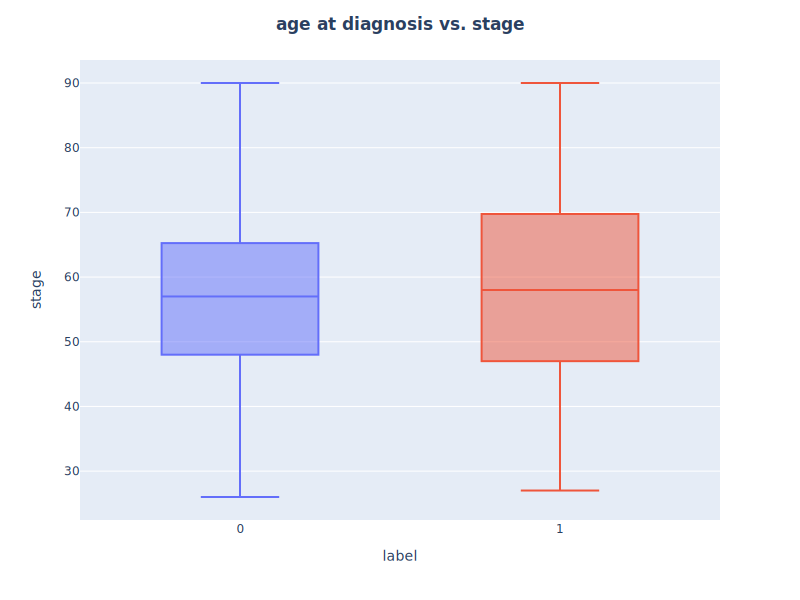

In [ ]:
clinical = genf.data_projection_list(data_object.get_obs(), ["age_at_initial_pathologic_diagnosis","race"])


for i in clinical.columns.drop("age_at_initial_pathologic_diagnosis"):
    print(data_object.get_obs().groupby([i, "label"]).count().iloc[:,1])
    

data_object.get_obs()["age_at_initial_pathologic_diagnosis"] = data_object.get_obs()["age_at_initial_pathologic_diagnosis"].astype(float)


data_subtype = genf.copy_object(data_object.get_obs())


# 0 means early stage, 1 means late
fig = genf.box_plot(data_object.get_obs(), x = "label", y= "age_at_initial_pathologic_diagnosis")

genf.show_figure(fig, xlabel = "label", ylabel = "stage", legend = False, title = "age at diagnosis vs. stage")

#genf.save_image(fig, fig_name = "ml_box_plot", img_format = "pdf", xlabel = "label", ylabel = "stage", legend = False, title = "age at diagnosis vs. stage")

In [ ]:
data_object.summary_object()


##############################################

Data Object
	Dimensions:  (60660, 878)
	Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
	Column Names (878): TCGA-3C-AALI ... TCGA-WT-AB41

	Var
		Dimensions:  (60660, 2)
		Row Names (60660): ENSG00000000003.15 ... ENSG00000288675.1
		Column Names (2): gene_name ... gene_type

	Obs
		Dimensions:  (772, 112)
		Row Names (772): TCGA-3C-AALI ... TCGA-WT-AB41
		Column Names (112): bcr_patient_uuid ... label

##############################################


# ============================================================
# ~ DROP GENE COLUMNS CONTAINING MORE THAN 10% NA
# ============================================================

In [ ]:
data_object = genf.counts_replace(data_object, 0)

# Calculate the thresh
#perc = 10.0
#min_count = int(((100-perc)/100)*data_object.counts_num_columns() + 1)
min_count = genf.thresh_by_perc(data_object.get_counts(), 10.0, axis = 1)

# mod_data = data.dropna( axis = 0, thresh = min_count)

data_object = genf.counts_drop_nan_by_thresh(data_object, 0, min_count)

data_object = genf.counts_replace_nan(data_object)

print("IS THERE NAN VALUES???? ")

print(data_object.get_counts().isnull().values.any())

print(data_object.get_counts().isnull().sum().sum())


                    TCGA-3C-AALI  TCGA-3C-AALJ  TCGA-3C-AALK  TCGA-A1-A0SD  \
ENSG00000000003.15         418.0        1303.0        2969.0        2477.0   
ENSG00000000005.6            2.0          52.0           4.0          50.0   
ENSG00000000419.13        1818.0        1281.0        1386.0        2775.0   
ENSG00000000457.14        2437.0         380.0        1315.0        1430.0   
ENSG00000000460.17         490.0         239.0         460.0         375.0   
...                          ...           ...           ...           ...   
ENSG00000288658.1           29.0          27.0           9.0          18.0   
ENSG00000288663.1           47.0          35.0          44.0          25.0   
ENSG00000288670.1          277.0         148.0         277.0         352.0   
ENSG00000288674.1            9.0           5.0          14.0           2.0   
ENSG00000288675.1           45.0          27.0          54.0          19.0   

                    TCGA-A1-A0SF  TCGA-A1-A0SH  TCGA-A1-A0SI  T

# ============================================================
# GENERATE YOUR PROCESSED FEATURE VECTOR FOR EACH EXAMPLE
# ============================================================

In [ ]:
data_transpose = genf.transpose(data_object.get_counts())

print(data_transpose)
      
# Calculate variance of genes
#var = dict(zip(data_transpose.var().index, data_transpose.var()))

# index without values and list are index_base, and var() is Series
var = genf.variance(data_transpose)

# Sort genes by variance
"""
var_sort = sorted(var.items(), key=lambda d: d[1], reverse=True)

# Find top 1000 genes

var_1000 = [i for i, j in var_sort[0:1000]]
"""

var_1000 = genf.top_variables(var, 1000)

# FILTERS GNAMES TO GENES_100 (1000)

gnames = genf.data_zip(data_object.get_var(), "gene_id", "gene_name")

genes_1000 = genf.filter_dictionary(gnames, var_1000)

              ENSG00000000003.15  ENSG00000000005.6  ENSG00000000419.13  \
TCGA-3C-AALI               418.0                2.0              1818.0   
TCGA-3C-AALJ              1303.0               52.0              1281.0   
TCGA-3C-AALK              2969.0                4.0              1386.0   
TCGA-A1-A0SD              2477.0               50.0              2775.0   
TCGA-A1-A0SF              8999.0                9.0              1624.0   
...                          ...                ...                 ...   
TCGA-S3-AA17              3444.0                1.0              2348.0   
TCGA-UL-AAZ6               938.0                1.0              1158.0   
TCGA-UU-A93S               350.0               36.0              1308.0   
TCGA-V7-A7HQ              2293.0                5.0               703.0   
TCGA-WT-AB41              1526.0               18.0               805.0   

              ENSG00000000457.14  ENSG00000000460.17  ENSG00000000938.13  \
TCGA-3C-AALI           

In [ ]:
genes_7 = ["MYC", "PIK3CA", "TP53", "BRCA1", "BRCA2", "CDH1", "PTEN"]
lkgenes_7 = []

for gen in genes_7:
    
    if gen not in list(genes_1000.values()):
        
        kgenes_7 = list(gnames.keys())[list(gnames.values()).index(gen)]
        lkgenes_7.append(kgenes_7)
        
# Select 1007 genes
print(len(list(genes_1000.keys())))

print(data_object.get_counts())

data_object = genf.counts_selection(data_object, (list(genes_1000.keys()) + lkgenes_7))


data_object.summary_object()

1000
                    TCGA-3C-AALI  TCGA-3C-AALJ  TCGA-3C-AALK  TCGA-A1-A0SD  \
ENSG00000000003.15         418.0        1303.0        2969.0        2477.0   
ENSG00000000005.6            2.0          52.0           4.0          50.0   
ENSG00000000419.13        1818.0        1281.0        1386.0        2775.0   
ENSG00000000457.14        2437.0         380.0        1315.0        1430.0   
ENSG00000000460.17         490.0         239.0         460.0         375.0   
...                          ...           ...           ...           ...   
ENSG00000288658.1           29.0          27.0           9.0          18.0   
ENSG00000288663.1           47.0          35.0          44.0          25.0   
ENSG00000288670.1          277.0         148.0         277.0         352.0   
ENSG00000288674.1            9.0           5.0          14.0           2.0   
ENSG00000288675.1           45.0          27.0          54.0          19.0   

                    TCGA-A1-A0SF  TCGA-A1-A0SH  TCGA-A1-A0

# ============================================================
# REMOVE HIGH CORRELATED VARIABLES
# ============================================================

Find high Correlation



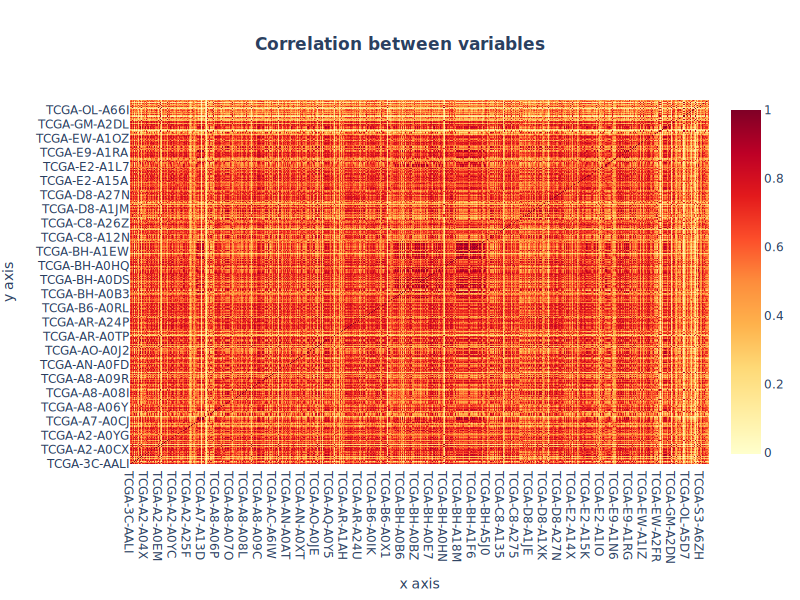

              ENSG00000002834.18  ENSG00000003989.18  ENSG00000004478.8  \
TCGA-3C-AALI              9835.0              1648.0             9006.0   
TCGA-3C-AALJ             20778.0              2980.0             6593.0   
TCGA-3C-AALK             59958.0              9267.0            14304.0   
TCGA-A1-A0SD             19902.0            136826.0            19526.0   
TCGA-A1-A0SF             24177.0              8760.0            19130.0   
...                          ...                 ...                ...   
TCGA-S3-AA17             15184.0               285.0            15603.0   
TCGA-UL-AAZ6             13731.0               571.0            33349.0   
TCGA-UU-A93S              4582.0               129.0             3675.0   
TCGA-V7-A7HQ              2687.0              3729.0            19841.0   
TCGA-WT-AB41              2666.0               255.0             7502.0   

              ENSG00000006125.18  ENSG00000006831.10  ENSG00000007062.12  \
TCGA-3C-AALI           

In [ ]:
print("Find high Correlation\n")
# Find high correlation

corr = genf.var_correlation(data_object.get_counts())


fig = genf.heatmap(x = corr.columns, y = corr.index, z = genf.ut.np.array(corr))

genf.show_figure(fig, xlabel = "x axis", ylabel = "y axis", legend = False, title = "Correlation between variables")

#genf.save_image(fig, fig_name = "ml_heatmap", xlabel = "x axis", ylabel = "y axis", legend = False, title = "Correlation between variables")

genes = genf.remove_correlation(data_object.get_counts(), 0.6)

# genes = qa.transpose(genes)

# print(genes.shape) (878, 506)

#genes = genes[genes.index.isin(data_subtype.index)]

genes = genf.data_selection_list(genes, list(data_subtype.index.values))

final_data = genes

# def update_column_values
final_data["label"] = data_subtype.label

print(final_data)

# =============================================================================
#                              MACHINE LEARNING
# =============================================================================

# ============================================================
# MODELO UNO
# ============================================================

In [ ]:
print("MODELO UNO:")

data = genf.create_model_selection(final_data.copy())

data.split_data()

data.get_train_test_sample(test_size = 0.2, resample = True)

data.standarize()

print("\n\n")
models = []

models.append(genf.model_logistic_regression('LR', solver='lbfgs', max_iter=1000))
models.append(genf.model_random_forest('RF', n_estimators=500))
models.append(genf.model_scikit_learn('GNB', GaussianNB()))
models.append(genf.model_support_vector_classif('SVC', kernel = 'sigmoid',probability=True))
models.append(genf.model_neural_network('MLP', max_iter = 500, hidden_layer_sizes=(5,5,5)))

model_results = genf.ut.pd.DataFrame()


for model_for in models:   
    
    print('Fitting: ', model_for.get_name())
    
    model_for.fit(data.get_X_train(), data.get_Y_train())
    
    # Devuelve la probabilidad de que sea 0 o 1
    predictions_proba = data.predict_proba(model_for)
    # Nos quedamos con los que superen el 50% de la probabilidad
    predictions = data.get_predictions(predictions_proba, 0.5)    
    
    metrics = model_for.get_metrics(data.get_Y_test(), predictions, predictions_proba)
   
    model_results = genf.ut.pd.concat([model_results, metrics], axis=0) 


print(model_results)

MODELO UNO:



Fitting:  LR
Fitting:  RF
Fitting:  GNB
Fitting:  SVC
Fitting:  MLP
  model_name  precision    recall  specificity        f1  accuracy
0         LR   0.612500  0.710145     0.621951  0.657718  0.662252
0         RF   0.739130  0.492754     0.853659  0.591304  0.688742
0        GNB   0.493976  0.594203     0.487805  0.539474  0.536424
0        SVC   0.541667  0.376812     0.731707  0.444444  0.569536
0        MLP   0.647887  0.666667     0.695122  0.657143  0.682119


# ============================================================
# MODELO DOS
# ============================================================

In [ ]:
print("MODELO DOS:")

tmp = final_data.copy()

data7 = tmp.drop(lkgenes_7,axis=1)

data = genf.create_model_selection(data7)

data.split_data()

data.get_train_test_sample(test_size = 0.2, resample = True)

data.standarize()

print("\n\n")
models = []

models.append(genf.model_logistic_regression('LR', solver='lbfgs', max_iter=1000))
models.append(genf.model_random_forest('RF', n_estimators=500))
models.append(genf.model_scikit_learn('GNB', GaussianNB()))
models.append(genf.model_support_vector_classif('SVC', kernel = 'sigmoid',probability=True))
models.append(genf.model_neural_network('MLP', max_iter = 500, hidden_layer_sizes=(5,5,5)))

model_results = genf.ut.pd.DataFrame()



for model_for in models:   
    
    print('Fitting: ', model_for.get_name())
    
    model_for.fit(data.get_X_train(), data.get_Y_train())
    
    # Devuelve la probabilidad de que sea 0 o 1
    predictions_proba = data.predict_proba(model_for)
    # Nos quedamos con los que superen el 50% de la probabilidad
    predictions = data.get_predictions(predictions_proba, 0.5)    
    
    metrics = model_for.get_metrics(data.get_Y_test(), predictions, predictions_proba)
   
    model_results = genf.ut.pd.concat([model_results, metrics], axis=0) 

print(model_results)

MODELO DOS:



Fitting:  LR
Fitting:  RF
Fitting:  GNB
Fitting:  SVC
Fitting:  MLP
  model_name  precision    recall  specificity        f1  accuracy
0         LR   0.590361  0.777778     0.613636  0.671233  0.682119
0         RF   0.694915  0.650794     0.795455  0.672131  0.735099
0        GNB   0.481132  0.809524     0.375000  0.603550  0.556291
0        SVC   0.518519  0.444444     0.704545  0.478632  0.596026
0        MLP   0.592593  0.761905     0.625000  0.666667  0.682119


# ============================================================
# MODELO TRES
# ============================================================

In [ ]:
print("MODELO TRES:")

tmp = final_data.copy()

label = tmp.label

tmp = genf.ut.pd.concat([tmp.iloc[:,:100],tmp.loc[:,lkgenes_7]], axis=1)
dup_cols = tmp.columns[tmp.columns.duplicated()]
tmp.drop(columns = dup_cols, inplace = True)

tmp['label'] = label

data107 = tmp.copy()

data = genf.create_model_selection(data107)

data.split_data()

data.get_train_test_sample(test_size = 0.2, resample = True)

data.standarize()

print("\n\n")
models = []

models.append(genf.model_logistic_regression('LR', solver='lbfgs', max_iter=1000))
models.append(genf.model_random_forest('RF', n_estimators=500))
models.append(genf.model_scikit_learn('GNB', GaussianNB()))
models.append(genf.model_support_vector_classif('SVC', kernel = 'sigmoid',probability=True))
models.append(genf.model_neural_network('MLP', max_iter = 500, hidden_layer_sizes=(5,5,5)))

model_results = genf.ut.pd.DataFrame()



for model_for in models:   
    
    print('Fitting: ', model_for.get_name())
    
    model_for.fit(data.get_X_train(), data.get_Y_train())
    
    # Devuelve la probabilidad de que sea 0 o 1
    predictions_proba = data.predict_proba(model_for)
    # Nos quedamos con los que superen el 50% de la probabilidad
    predictions = data.get_predictions(predictions_proba, 0.5)    
    
    metrics = model_for.get_metrics(data.get_Y_test(), predictions, predictions_proba)
   
    model_results = genf.ut.pd.concat([model_results, metrics], axis=0) 

print(model_results)

MODELO TRES:



Fitting:  LR
Fitting:  RF
Fitting:  GNB
Fitting:  SVC
Fitting:  MLP
  model_name  precision    recall  specificity        f1  accuracy
0         LR   0.516129  0.492308     0.651163  0.503937  0.582781
0         RF   0.763636  0.646154     0.848837  0.700000  0.761589
0        GNB   0.514286  0.830769     0.406977  0.635294  0.589404
0        SVC   0.527778  0.292308     0.802326  0.376238  0.582781
0        MLP   0.621212  0.630769     0.709302  0.625954  0.675497


# ============================================================
# MODELO CUATRO
# ============================================================

In [ ]:
print("MODELO CUATRO:")


tmp = final_data.copy()

label = tmp.label

data = genf.ut.pd.concat([tmp.iloc[:,:50],tmp.loc[:,lkgenes_7]], axis=1)
dup_cols = tmp.columns[tmp.columns.duplicated()]
tmp.drop(columns = dup_cols, inplace = True)

tmp['label']=label

data57 = tmp.copy()   

data = genf.create_model_selection(data57)

data.split_data()

data.get_train_test_sample(test_size = 0.2, resample = True)

data.standarize()

print("\n\n")
models = []

models.append(genf.model_logistic_regression('LR', solver='lbfgs', max_iter=1000))
models.append(genf.model_random_forest('RF', n_estimators=500))
models.append(genf.model_scikit_learn('GNB', GaussianNB()))
models.append(genf.model_support_vector_classif('SVC', kernel = 'sigmoid',probability=True))
models.append(genf.model_neural_network('MLP', max_iter = 500, hidden_layer_sizes=(5,5,5)))

model_results = genf.ut.pd.DataFrame()


for model_for in models:   
    
    print('Fitting: ', model_for.get_name())
    
    model_for.fit(data.get_X_train(), data.get_Y_train())
    
    # Devuelve la probabilidad de que sea 0 o 1
    predictions_proba = data.predict_proba(model_for)
    # Nos quedamos con los que superen el 50% de la probabilidad
    predictions = data.get_predictions(predictions_proba, 0.5)    
    
    metrics = model_for.get_metrics(data.get_Y_test(), predictions, predictions_proba)
   
    model_results = genf.ut.pd.concat([model_results, metrics], axis=0) 

print(model_results)

MODELO CUATRO:



Fitting:  LR
Fitting:  RF
Fitting:  GNB
Fitting:  SVC
Fitting:  MLP
  model_name  precision    recall  specificity        f1  accuracy
0         LR   0.662500  0.736111     0.658228  0.697368  0.695364
0         RF   0.903846  0.652778     0.936709  0.758065  0.801325
0        GNB   0.555556  0.833333     0.392405  0.666667  0.602649
0        SVC   0.568182  0.347222     0.759494  0.431034  0.562914
0        MLP   0.638298  0.833333     0.569620  0.722892  0.695364


# ============================================================
# OPTIMIZANDO RANDOM FOREST AJUSTANDO SUS HIPERPARAMETROS
# ============================================================

In [ ]:
data = genf.create_model_selection(data107)

data.split_data()

data.get_train_test_sample(test_size = 0.2, resample = True)

data.standarize()

random_forest = genf.model_random_forest('RF')

random_forest.hyperparameter_tuning(data.get_X_train(), data.get_Y_train(), n_estimators = [10,50,100,500])

random_forest.fit(data.get_X_train(), data.get_Y_train())

predictions_proba = data.predict_proba(random_forest)
predictions = data.get_predictions(predictions_proba, threshold = 0.5)

metrics = random_forest.get_metrics(data.get_Y_test(), predictions, predictions_proba)

print(metrics)

  model_name  precision    recall  specificity    f1  accuracy
0         RF   0.661017  0.639344     0.777778  0.65  0.721854


# ========================================================
# CURVA PRECISION-RECALL
# ========================================================


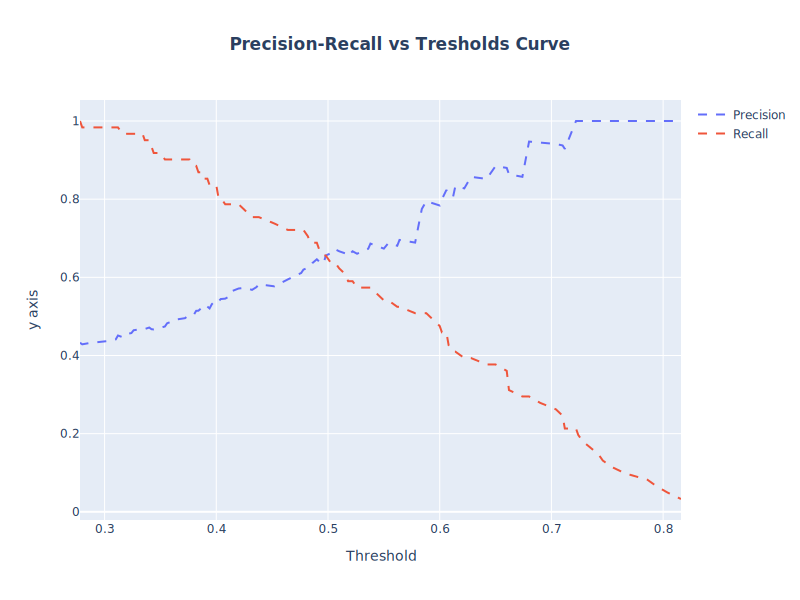

In [ ]:
prc_vs_threshold = genf.plot_prec_recall_vs_thresh(data.get_Y_test() , predictions_proba)

genf.show_figure(prc_vs_threshold, xlabel = "Threshold", title = 'Precision-Recall vs Tresholds Curve')

genf.save_image(prc_vs_threshold, fig_name="prc_vs_threshold", img_format = "pdf", xlabel = "Threshold", title = 'Precision-Recall vs Tresholds Curve')

# ============================================================
# MATRIZ DE CONFUSION
# ============================================================

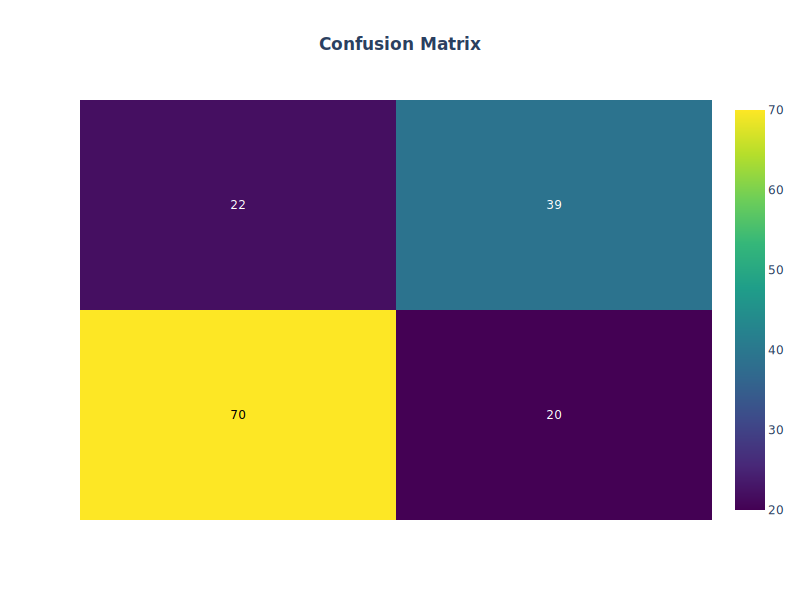

In [ ]:
cm = data.confusion_matrix(predictions)

confs = genf.plot_confusion_matrix(cm)

genf.show_figure(confs, xlabel = "", ylabel = "", title = "Confusion Matrix")

genf.save_image(confs, fig_name ="confusion_matrix", img_format = "pdf", xlabel = "", ylabel = "", title="Confusion Matrix")

# ============================================================
# CURVA ROC
# ============================================================


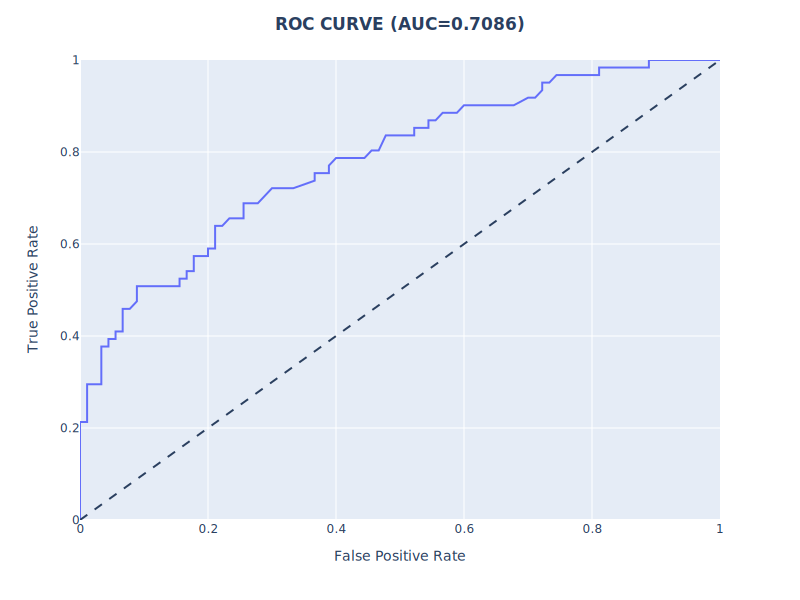

In [ ]:
roc_auc = data.calc_auc(predictions)

roc = genf.plot_roc(data.get_Y_test(), predictions_proba)

genf.show_figure(roc, xlabel = "False Positive Rate", ylabel = "True Positive Rate", x_ini_range = 0, x_fin_range = 1,
                    y_ini_range = 0, y_fin_range = 1, title = "ROC CURVE " + f'(AUC={roc_auc:.4f})')

genf.save_image(roc, fig_name="roc", img_format = "pdf", xlabel = "False Positive Rate", ylabel = "True Positive Rate", x_ini_range = 0, x_fin_range = 1,
                    y_ini_range = 0, y_fin_range = 1, title = "ROC CURVE " + f'(AUC={roc_auc:.4f})')

# ============================================================
# CURVA PRECISION-RECALL
# ============================================================

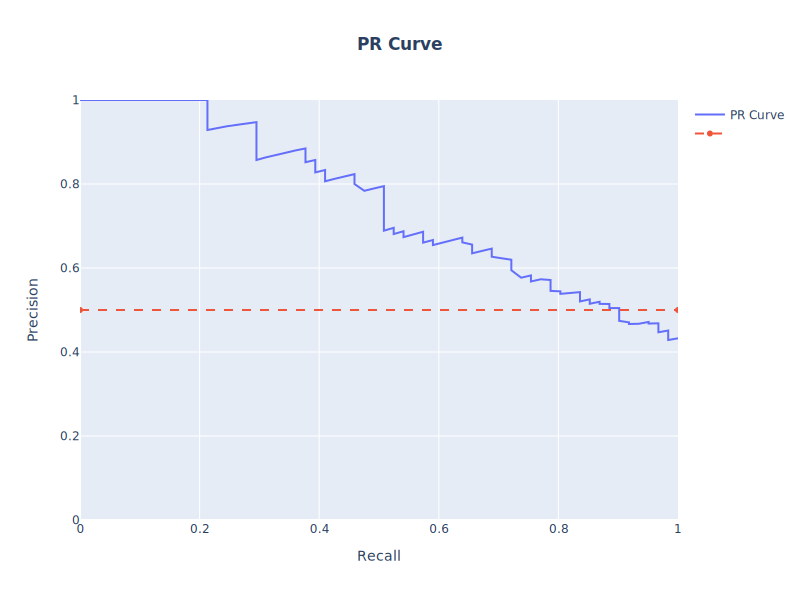

In [ ]:
pr_auc = data.calc_auc(predictions, curve = "precision-recall")
title = "PR CURVE " + f'(AUC={pr_auc:.4f})'

pr = genf.plot_prc(data.get_Y_test(), predictions_proba)

genf.show_figure(pr, xlabel = "Recall", ylabel = "Precision", x_ini_range = 0, x_fin_range = 1, y_ini_range = 0, y_fin_range = 1, title = 'PR Curve')

genf.save_image(pr, fig_name="prc", img_format = "pdf", xlabel = "Recall", ylabel = "Precision", x_ini_range = 0, x_fin_range = 1,
                    y_ini_range = 0, y_fin_range = 1, title = 'PR Curve')